In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from os import listdir

from tqdm import tqdm

2025-07-04 18:56:05.555012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751655365.826140      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751655365.907790      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
MAX_PIXELS_WIDTH = 120
MAX_PIXELS_HEIGHT = 120
BATCH_SIZE = 20
X = []
Z = []
INITIAL_FLOWER_DIR = "../input/flowers-recognition/flowers"
FLOWER_DAISY_DIR='../input/flowers-recognition/flowers/daisy'
FLOWER_SUNFLOWER_DIR='../input/flowers-recognition/flowers/sunflower'
FLOWER_TULIP_DIR='../input/flowers-recognition/flowers/tulip'
FLOWER_DANDI_DIR='../input/flowers-recognition/flowers/dandelion'
FLOWER_ROSE_DIR='../input/flowers-recognition/flowers/rose'



flowers_dirs = [FLOWER_DAISY_DIR, FLOWER_SUNFLOWER_DIR, FLOWER_TULIP_DIR, FLOWER_DANDI_DIR, FLOWER_ROSE_DIR]
flowers_label = ["daisy", "sunflower","tulip", "dandelion", "rose"]

print()

In [3]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=flower_type
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (MAX_PIXELS_WIDTH,MAX_PIXELS_HEIGHT))
        
        X.append(np.array(img))
        Z.append(str(label))


for i in range(5):
    make_train_data(flowers_label[i], flowers_dirs[i])

print(F"Length of X array len(X)")

100%|██████████| 784/784 [00:09<00:00, 81.85it/s]

Length of X array len(X)


In [4]:
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [5]:
train_generator = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator.fit(x_train)

In [6]:
# validation_datagen = ImageDataGenerator(rescale=1.0/255)
# validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
#                                                              target_size=(MAX_PIXELS_WIDTH, MAX_PIXELS_HEIGHT),
#                                                              batch_size=BATCH_SIZE,
#                                                              class_mode='categorical',
#                                                              shuffle=True)

In [7]:
# labels = {value: key for key, value in train_generator.class_indices.items()}

# print("Label Mappings for classes present in the training and validation datasets\n")
# for key, value in labels.items():
#     print(f"{key} : {value}")

In [8]:
# fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
# idx = 0

# for i in range(2):
#     for j in range(5):
#         label = labels[np.argmax(train_generator[0][1][idx])]
#         ax[i, j].set_title(f"{label}")
#         ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
#         ax[i, j].axis("off")
#         idx += 1

# plt.tight_layout()
# plt.suptitle("Sample Training Images", fontsize=21)
# plt.show()

In [9]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (MAX_PIXELS_WIDTH,MAX_PIXELS_HEIGHT,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 120, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))



2025-07-04 18:57:17.055535: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 120, 120, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 120)         │         103,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 120)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5880)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,011,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,193,757 (12.18 MB)

 Trainable params: 3,193,757 (12.18 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [12]:
optimizer = Adam(learning_rate=0.001)

In [13]:
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,epochs=10,batch_size=BATCH_SIZE,validation_data = (x_test,y_test))

Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 78s 458ms/step - accuracy: 0.3543 - loss: 1.4490 - val_accuracy: 0.5463 - val_loss: 1.2180
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 73s 451ms/step - accuracy: 0.5856 - loss: 1.0664 - val_accuracy: 0.6556 - val_loss: 0.9184
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 77s 476ms/step - accuracy: 0.6485 - loss: 0.9042 - val_accuracy: 0.6611 - val_loss: 0.9226
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 78s 483ms/step - accuracy: 0.6929 - loss: 0.8264 - val_accuracy: 0.6398 - val_loss: 0.9889
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 77s 476ms/step - accuracy: 0.7236 - loss: 0.7310 - val_accuracy: 0.6519 - val_loss: 0.9996
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 77s 476ms/step - accuracy: 0.7615 - loss: 0.6156 - val_accuracy: 0.6574 - val_loss: 0.9529
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 78s 479ms/step - accuracy: 0.8187 - loss: 0.4903 - val_accuracy: 0.6778 - val_loss: 1.0276
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 77s 478ms/step - accuracy: 0.8988 - loss: 0

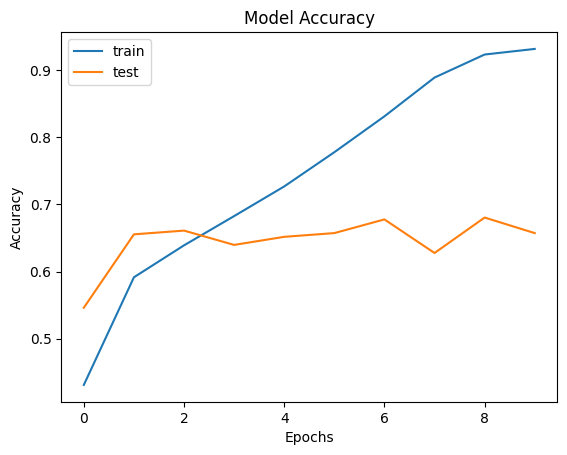

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()